# Build a class for floor plan

## 0. Enumeration

In [13]:
from enum import Enum

class RoomType(Enum):
    LIVING_ROOM = 1          # Living Room
    DINING_ROOM = 2          # Dining Room
    KITCHEN = 3              # Kitchen
    BEDROOM = 4               # Bedroom
    MASTER_BEDROOM = 5       # Master Bedroom/Main Bedroom
    # CHILDRENS_ROOM = 6       # Children's Room
    BATHROOM = 7              # Bathroom
    MASTER_BATHROOM = 8      # Master Bathroom
    GUEST_BATHROOM = 9       # Guest Bathroom
    STUDY = 10                # Study/Office
    # GAME_ROOM = 11           # Game Room
    # GYM = 12                  # Gym
    # HOME_THEATER = 13        # Home Theater
    LAUNDRY_ROOM = 14        # Laundry Room
    STORAGE_ROOM = 15        # Storage Room
    GARAGE = 16              # Garage
    # FOYER = 17                # Foyer
    HALLWAY = 18             # Hallway
    # TERRACE = 19             # Terrace
    # FAMILY_ROOM = 20         # Family Room
    GUEST_ROOM = 21          # Guest Room
    # UTILITY_ROOM = 22        # Utility Room
    # WALK_IN_CLOSET = 23      # Walk-in Closet
    YARD = 24           # Courtyard (Outdoor or central area)
    TOILET = 25              # Toilet
    BALCONY = 26             # Balcony

    def __str__(self):
        return self.name.replace('_', ' ')
    
class Sections(Enum):
    PUBLIC_SPACES = 1
    # EXAMPLES: Living Room, Dining Room, Kitchen

    PRIVATE_SPACES = 2
    # EXAMPLES: Bedroom, Master Bedroom, Children's Room, Toilet, Bathroom

    SERVICE_SPACES = 3
    # EXAMPLES: Laundry, Storage, Garage

    TRANSITIONAL_SPACES = 4
    # EXAMPLES: Hallway, Foyer, Terrace

    OTHERS = 5
    # EXAMPLES: Study, Game Room, Gym, Home Theater, Balcony/Patio, Courtyard

    def __str__(self):
        return self.name.replace('_', ' ')

## 1. Vertex

In [14]:
# Vertex class
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f'({self.x}, {self.y})'

In [15]:
vertex1 = Vertex(1, 2)
vertex2 = Vertex(3, 4)
print(vertex1)
print(vertex2)

(1, 2)
(3, 4)


## 2. Door

In [16]:
# Door class
# it can also be an entrance or exit
class Door:
    def __init__(self, name, vertex1, vertex2, length=2.0):
        self.name = name
        self.component_type = 'Door'
        # door's position 
        self.vertex1 = vertex1
        self.vertex2 = vertex2
        # door's length
        self.length = max(length, 2.0)
        # door's width
        self.width = ((vertex1.x-vertex2.x)**2 + (vertex1.y-vertex2.y)**2)**0.5
         # Adjust vertices if width is less than min_width 0.9
        if self.width < 0.9:
            self.adjust_vertices(0.9)

    def adjust_vertices(self, min_width):
        if self.vertex2.x == self.vertex1.x:
            if self.vertex2.y > self.vertex1.y:
                self.vertex2.y = self.vertex1.y + min_width
            else:
                self.vertex1.y = self.vertex2.y + min_width

        if self.vertex2.y == self.vertex1.y:
            if self.vertex2.x > self.vertex1.x:
                self.vertex2.x = self.vertex1.x + min_width
            else:
                self.vertex1.x = self.vertex2.x + min_width

        # Update the width
        self.width = min_width

    def __str__(self):
        return f'Door>> {self.name}: {{{self.vertex1}~{self.vertex2}}}, width: {self.width}, length: {self.length}'

door1 = Door('door1', Vertex(0,0), Vertex(0,0.8))
print(door1)

Door>> door1: {(0, 0)~(0, 0.9)}, width: 0.9, length: 2.0


## 3. Window (similar to Door)

In [17]:
# Window class
class Window:
    def __init__(self, name, vertex1, vertex2, length=0.4, height=0.0):
        self.name = name
        self.component_type = 'Window'
        # window's position 
        self.vertex1 = vertex1
        self.vertex2 = vertex2
        # height is the distance from floor to the bottom of the window
        self.height = height
        # window's width
        self.width = ((vertex1.x-vertex2.x)**2 + (vertex1.y-vertex2.y)**2)**0.5
        # window's length
        self.length = length if length > 0.4 else 0.4

        # Adjust vertices if width is less than min_width 0.4
        if self.width < 0.4:
            self.adjust_vertices(0.4)

    def adjust_vertices(self, min_width):
        if self.vertex2.x == self.vertex1.x:
            if self.vertex2.y > self.vertex1.y:
                self.vertex2.y = self.vertex1.y + min_width
            else:
                self.vertex1.y = self.vertex2.y + min_width

        if self.vertex2.y == self.vertex1.y:
            if self.vertex2.x > self.vertex1.x:
                self.vertex2.x = self.vertex1.x + min_width
            else:
                self.vertex1.x = self.vertex2.x + min_width

        # Update the width
        self.width = min_width

    def __str__(self):
        return f'Window>> {self.name}: {{{self.vertex1}~{self.vertex2}}}, width: {self.width}, length: {self.length}, height: {self.height}'
    
window1 = Window('window1', Vertex(0,0.39), Vertex(0,0), length=0.9, height=6.0)
print(window1)

Window>> window1: {(0, 0.4)~(0, 0)}, width: 0.4, length: 0.9, height: 6.0


## 4. Room

In [18]:
# Room class
class Room:
    def __init__(self, name, type, vertices=[], doors=[], windows=[]):
        self.name = name
        # room's vertices, clockwise order
        self.vertices = vertices
        # room's walls
        self.walls = []
        # room's doors
        self.doors = doors
        # room's windows
        self.windows = windows
        # room's type
        self.type = type
        # room's area
        self.area = self.get_area()
        # room's centroid
        self.centroid = self.get_centroid()
        # adjacent rooms
        self.adjacent_rooms = []
        # number of doors
        self.num_doors = len(self.doors)
        # minimum width/length of the room
        self.min_width = 0.9

    # calculate the area of the room, contains irregular shapes
    def get_area(self):
        x, y = [vertex.x for vertex in self.vertices], [vertex.y for vertex in self.vertices]
        x = list(x) + [x[0]]
        y = list(y) + [y[0]]
        area = 0
        for i in range(len(x) - 1):
            area += x[i] * y[i + 1] - x[i + 1] * y[i]
        return abs(area) / 2
    
    def get_centroid(self):
        x_list = [vertex.x for vertex in self.vertices]
        y_list = [vertex.y for vertex in self.vertices]
        n = len(self.vertices)
        
        # Calculate the signed area of the polygon
        A = 0.5 * sum(x_list[i] * y_list[(i + 1) % n] - x_list[(i + 1) % n] * y_list[i] for i in range(n))
        
        # Calculate the centroid coordinates
        C_x = (1 / (6 * A)) * sum((x_list[i] + x_list[(i + 1) % n]) * (x_list[i] * y_list[(i + 1) % n] - x_list[(i + 1) % n] * y_list[i]) for i in range(n))
        C_y = (1 / (6 * A)) * sum((y_list[i] + y_list[(i + 1) % n]) * (x_list[i] * y_list[(i + 1) % n] - x_list[(i + 1) % n] * y_list[i]) for i in range(n))
        
        return Vertex(C_x, C_y)
    
    def add_adjacent_room(self, room):
        self.adjacent_rooms.append(room)

    def wall_feasibility_check(self):
        for i in range(len(self.vertices)):
            vertex1 = self.vertices[i]
            vertex2 = self.vertices[(i+1)%len(self.vertices)]
            # wall's length >= 0.9
            if ((vertex1.x-vertex2.x)**2 + (vertex1.y-vertex2.y)**2)**0.5 < 0.9:
                print(f'Wall {vertex1, vertex2} is too short')
                return False
    
    def door_feasibility_check(self):
        # check all doors
        for door in self.doors:
            is_feasible = False
            if door.vertex1.x == door.vertex2.x:
                door_orientation = 'vertical'
            elif door.vertex1.y == door.vertex2.y:
                door_orientation = 'horizontal'
            else:
                print(f'{door.name} is not vertical or horizontal')
                continue

            for i in range(len(self.vertices)):
                vertex1 = self.vertices[i]
                vertex2 = self.vertices[(i+1)%len(self.vertices)]
                if door_orientation == 'vertical':
                    # get the wall that the door is on
                    if door.vertex1.x == vertex1.x and door.vertex2.x == vertex2.x:
                        if min(door.vertex1.y, door.vertex2.y) >= min(vertex1.y, vertex2.y) and max(door.vertex1.y, door.vertex2.y) <= max(vertex1.y, vertex2.y):
                            is_feasible = True
                            break
                        else:
                            print(f'{door.name} is not on the wall')
                            return False
                elif door_orientation == 'horizontal':
                    # get the wall that the door is on
                    if door.vertex1.y == vertex1.y and door.vertex2.y == vertex2.y:
                        if min(door.vertex1.x, door.vertex2.x) >= min(vertex1.x, vertex2.x) and max(door.vertex1.x, door.vertex2.x) <= max(vertex1.x, vertex2.x):
                            is_feasible = True
                            break
                        else:
                            print(f'{door.name} is not on the wall')
                            return False
            if is_feasible:
                continue
        return True

    def window_feasibility_check(self):
        # check all windows
        for window in self.windows:
            is_feasible = False
            if window.vertex1.x == window.vertex2.x:
                window_orientation = 'vertical'
            elif window.vertex1.y == window.vertex2.y:
                window_orientation = 'horizontal'
            else:
                print(f'{window.name} is not vertical or horizontal')
                continue

            for i in range(len(self.vertices)):
                vertex1 = self.vertices[i]
                vertex2 = self.vertices[(i+1)%len(self.vertices)]
                if window_orientation == 'vertical':
                    # get the wall that the window is on
                    if window.vertex1.x == vertex1.x and window.vertex2.x == vertex2.x:
                        if min(window.vertex1.y, window.vertex2.y) >= min(vertex1.y, vertex2.y) and max(window.vertex1.y, window.vertex2.y) <= max(vertex1.y, vertex2.y):
                            is_feasible = True
                            break
                        else:
                            print(f'{window.name} is not on the wall')
                            return False
                elif window_orientation == 'horizontal':
                    # get the wall that the window is on
                    if window.vertex1.y == vertex1.y and window.vertex2.y == vertex2.y:
                        if min(window.vertex1.x, window.vertex2.x) >= min(vertex1.x, vertex2.x) and max(window.vertex1.x, window.vertex2.x) <= max(vertex1.x, vertex2.x):
                            is_feasible = True
                            break
                        else:
                            print(f'{window.name} is not on the wall')
                            return False
            if is_feasible:
                continue
        return True
            
    
    def __str__(self):
        doors = ', '.join([door.name for door in self.doors])
        windows = ', '.join([window.name for window in self.windows])
        adjacent_rooms = ', '.join([room.name for room in self.adjacent_rooms])
        vertex_str = ', '.join([str(vertex) for vertex in self.vertices])
        return f'{self.name}: {self.type}, area: {self.area}, doors: {doors}, windows: {windows}, \nvertices: {vertex_str}, \nadjacent rooms: {adjacent_rooms}'


In [19]:
vertices = [Vertex(0,0), Vertex(0,10), Vertex(10,10), Vertex(10,0)]

door1 = Door('door1', Vertex(0,0), Vertex(0,1))  # noqa: F821
window1 = Window('window1', Vertex(0,3), Vertex(0,4), length=0.9, height=6.0)  # noqa: F821
room1 = Room('room1', RoomType.LIVING_ROOM, vertices, [door1], [window1])  # noqa: F821
print(room1)

room1: LIVING ROOM, area: 100.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 10), (10, 10), (10, 0), 
adjacent rooms: 


### *Sample floor plan*
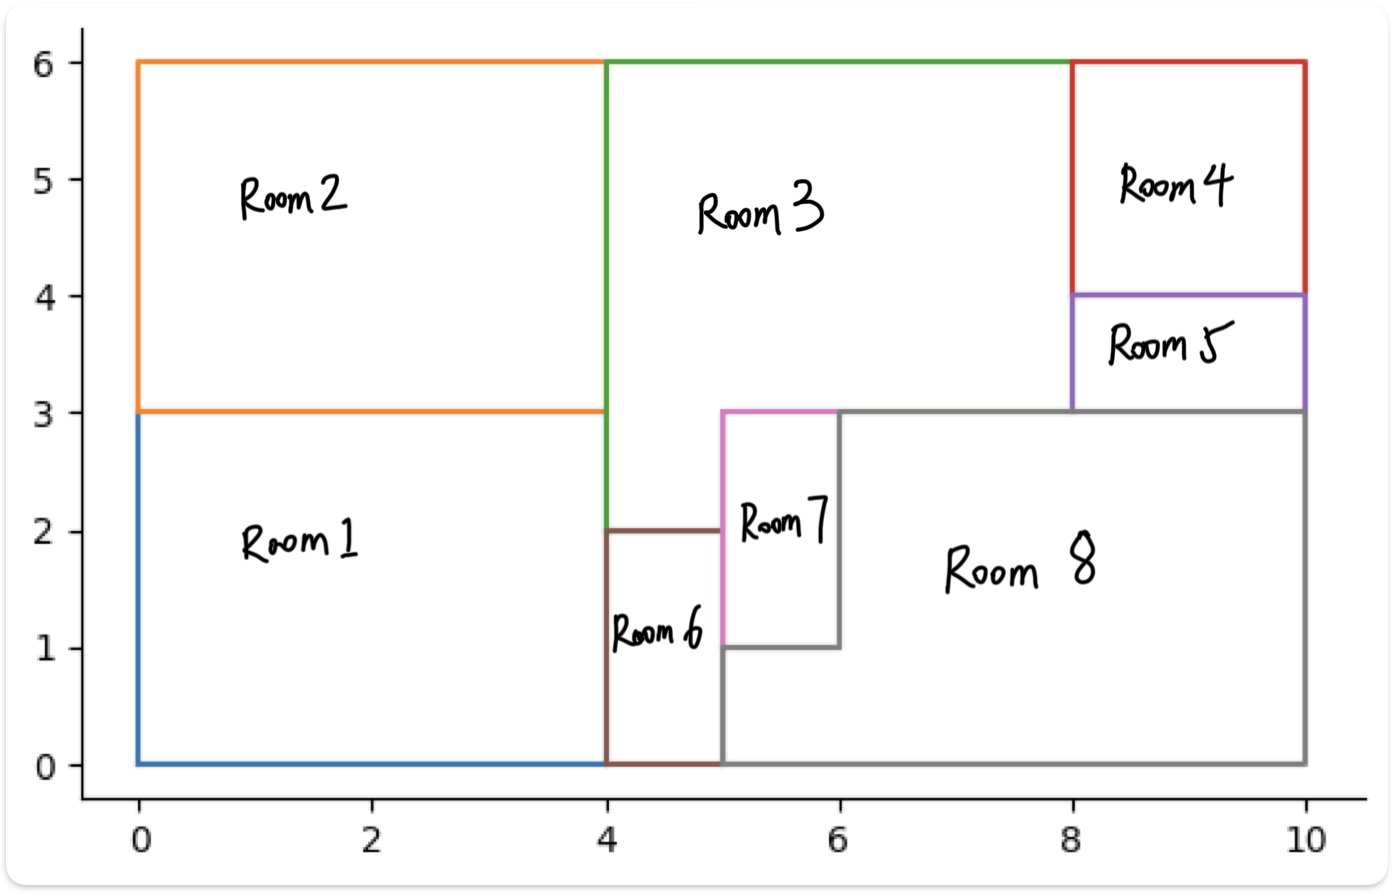

In [20]:
# create new rooms with different types
# every room has a door and a window on the wall, no collapes
vertices1 = [Vertex(0, 0), Vertex(0, 3), Vertex(4, 3), Vertex(4, 0)]
vertices2 = [Vertex(0, 3), Vertex(0, 6), Vertex(4, 6), Vertex(4, 3)]
vertices3 = [Vertex(4, 2), Vertex(4, 6), Vertex(8, 6), Vertex(8, 3), Vertex(5, 3), Vertex(5, 2)]
vertices4 = [Vertex(8, 4), Vertex(8, 6), Vertex(10, 6), Vertex(10, 4)]
vertices5 = [Vertex(8, 3), Vertex(8, 4), Vertex(10, 4), Vertex(10, 3)]
vertices6 = [Vertex(4, 0), Vertex(4, 2), Vertex(5, 2), Vertex(5, 0)]
vertices7 = [Vertex(5, 1), Vertex(5, 3), Vertex(6, 3), Vertex(6, 1)]
vertices8 = [Vertex(5, 0), Vertex(5, 1), Vertex(6, 1), Vertex(6, 3), Vertex(10, 3), Vertex(10, 0)]

# Create doors for each room
door1 = Door('door1', Vertex(0, 0), Vertex(0, 1))
door2 = Door('door2', Vertex(0, 3), Vertex(0, 4))
door3 = Door('door3', Vertex(4, 2), Vertex(4, 3))
door4 = Door('door4', Vertex(8, 4), Vertex(8, 5))
door5 = Door('door5', Vertex(8, 3), Vertex(8, 4))
door6 = Door('door6', Vertex(4, 0), Vertex(4, 1))
door7 = Door('door7', Vertex(5, 1), Vertex(5, 2))
door8 = Door('door8', Vertex(5, 0), Vertex(5, 1))

# Create windows for each room
window1 = Window('window1', Vertex(1.5, 0), Vertex(2.5, 0), length=0.9, height=6.0)
window2 = Window('window2', Vertex(2, 6), Vertex(3, 6), length=0.9, height=6.0)
window3 = Window('window3', Vertex(8, 4), Vertex(8, 5), length=0.9, height=6.0)
window4 = Window('window4', Vertex(8, 6), Vertex(9, 6), length=0.9, height=6.0)
window5 = Window('window5', Vertex(5, 1), Vertex(5, 2), length=0.9, height=6.0)
window6 = Window('window6', Vertex(5, 0), Vertex(5, 1), length=0.9, height=6.0)
window7 = Window('window7', Vertex(4, 0), Vertex(4, 1), length=0.9, height=6.0)
window8 = Window('window8', Vertex(0, 0), Vertex(0, 1), length=0.9, height=6.0)

# Create rooms
room1 = Room('room1', RoomType.LIVING_ROOM, vertices1, [door1], [window1])
room2 = Room('room2', RoomType.DINING_ROOM, vertices2, [door2], [window2])
room3 = Room('room3', RoomType.KITCHEN, vertices3, [door3], [window3])
room4 = Room('room4', RoomType.BEDROOM, vertices4, [door4], [window4])
room5 = Room('room5', RoomType.MASTER_BEDROOM, vertices5, [door5], [window5])
room6 = Room('room6', RoomType.HALLWAY, vertices6, [door6], [window6])
room7 = Room('room7', RoomType.BATHROOM, vertices7, [door7], [window7])
room8 = Room('room8', RoomType.MASTER_BATHROOM, vertices8, [door8], [window8])

# Add adjacent rooms 
room1.adjacent_rooms = [room2, room3, room6]
room2.adjacent_rooms = [room1, room3]
room3.adjacent_rooms = [room1, room2, room4, room5, room6, room7, room8]
room4.adjacent_rooms = [room3, room5]
room5.adjacent_rooms = [room3, room4, room8]
room6.adjacent_rooms = [room1, room3, room7, room8]
room7.adjacent_rooms = [room3, room6, room8]
room8.adjacent_rooms = [room3, room5, room6, room7]

print(room1)
print(room2)
print(room3)
print(room4)
print(room5)
print(room6)
print(room7)
print(room8)


room1: LIVING ROOM, area: 12.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 3), (4, 3), (4, 0), 
adjacent rooms: room2, room3, room6
room2: DINING ROOM, area: 12.0, doors: door2, windows: window2, 
vertices: (0, 3), (0, 6), (4, 6), (4, 3), 
adjacent rooms: room1, room3
room3: KITCHEN, area: 13.0, doors: door3, windows: window3, 
vertices: (4, 2), (4, 6), (8, 6), (8, 3), (5, 3), (5, 2), 
adjacent rooms: room1, room2, room4, room5, room6, room7, room8
room4: BEDROOM, area: 4.0, doors: door4, windows: window4, 
vertices: (8, 4), (8, 6), (10, 6), (10, 4), 
adjacent rooms: room3, room5
room5: MASTER BEDROOM, area: 2.0, doors: door5, windows: window5, 
vertices: (8, 3), (8, 4), (10, 4), (10, 3), 
adjacent rooms: room3, room4, room8
room6: HALLWAY, area: 2.0, doors: door6, windows: window6, 
vertices: (4, 0), (4, 2), (5, 2), (5, 0), 
adjacent rooms: room1, room3, room7, room8
room7: BATHROOM, area: 2.0, doors: door7, windows: window7, 
vertices: (5, 1), (5, 3), (6, 3), (6, 1), 
adj

In [21]:
print(room1.centroid)
print(room2.centroid)
print(room3.centroid)

(2.0, 1.5)
(2.0, 4.5)
(5.884615384615384, 4.346153846153846)


In [22]:
print(room1.door_feasibility_check())
print(room2.door_feasibility_check())
print(room3.door_feasibility_check())

print(room1.window_feasibility_check())
print(room2.window_feasibility_check())
print(room3.window_feasibility_check())
print(room4.window_feasibility_check())
print(room5.window_feasibility_check())
print(room6.window_feasibility_check())

True
True
True
True
True
True
True
True
True


## 5. House

In [23]:
# install shapely
# %pip install shapely

In [ ]:
from shapely.geometry import Polygon
import networkx as nx

# House class
class House:
    def __init__(self, rooms=[]):
        self.rooms = rooms
        self.num_rooms = len(self.rooms)
        self.adjacent_matrix = []
        self.adjacent_list = []
        self.adjacent_graph = nx.Graph()
        self.area = self.get_area()
        self.interior_area = self.get_interior_area()
        # width of the house
        self.width = self.get_width()
        # depth of the house
        self.depth = self.get_depth()

    # fill adjacent rooms automatically
    def fill_adjacent_rooms(self):
        self.adjacent_list = [[] for _ in range(len(self.rooms))]
        for i in range(len(self.rooms)):
            self.adjacent_graph.add_node(i)
            for j in range(i + 1, len(self.rooms)):
                room1 = self.rooms[i]
                room2 = self.rooms[j]
                
                # Create polygons for the rooms
                polygon1 = Polygon([(vertex.x, vertex.y) for vertex in room1.vertices])
                polygon2 = Polygon([(vertex.x, vertex.y) for vertex in room2.vertices])
                
                # Check for adjacency without overlap
                if polygon1.touches(polygon2):
                    self.adjacent_list[i].append(room2.name)
                    self.adjacent_list[j].append(room1.name)
                    self.adjacent_graph.add_edge(i, j)

    # any room stand alone?
    def room_connected_check(self):
        self.fill_adjacent_rooms()
        return nx.is_connected(self.adjacent_graph)

    # def get_adjacent_matrix(self):
    #     adjacent_matrix = [[0 for _ in range(self.num_rooms)] for _ in range(self.num_rooms)]
    #     for i in range(self.num_rooms):
    #         for j in range(self.num_rooms):
    #             if self.rooms[i] in self.rooms[j].adjacent_rooms:
    #                 adjacent_matrix[i][j] = 1
    #     return adjacent_matrix

    # def get_adjacent_list(self):
    #     adjacent_list = []
    #     for i in range(self.num_rooms):
    #         adjacent_list.append([])
    #         for j in range(self.num_rooms):
    #             if self.adjacent_matrix[i][j] == 1:
    #                 adjacent_list[i].append(self.rooms[j])
    
    def get_area(self):
        return sum([room.area for room in self.rooms])
    
    def get_interior_area(self):
        return sum([room.area for room in self.rooms if room.type != RoomType.BALCONY])
    
    def get_width(self):
        x_list = [vertex.x for room in self.rooms for vertex in room.vertices]
        return max(x_list) - min(x_list)
    
    def get_depth(self):
        y_list = [vertex.y for room in self.rooms for vertex in room.vertices]
        return max(y_list) - min(y_list)
    
    def overlap_check(self):
        for i in range(len(self.rooms)):
            for j in range(i + 1, len(self.rooms)):
                room1 = self.rooms[i]
                room2 = self.rooms[j]
                
                # Create polygons for the rooms
                polygon1 = Polygon([(vertex.x, vertex.y) for vertex in room1.vertices])
                polygon2 = Polygon([(vertex.x, vertex.y) for vertex in room2.vertices])
                
                # Check for overlap or inclusion, but not just touching
                if polygon1.intersects(polygon2) and not polygon1.touches(polygon2):
                    # print(f'{room1.name} and {room2.name} overlap!')
                    return True
        return False

    def __str__(self):
        return f'House: {self.num_rooms} rooms, \nadjacent matrix: {self.adjacent_matrix}, \nadjacent list: {self.adjacent_list}'

In [25]:
rooms = [room1, room2, room3, room4, room5, room6, room7, room8]
house1 = House(rooms)
print(house1)

House: 8 rooms, 
adjacent matrix: [], 
adjacent list: []


In [26]:
print(house1.overlap_check())

False


In [27]:
print(house1.room_connected_check())

True


In [28]:
print(house1.adjacent_list)

[['room2', 'room3', 'room6'], ['room1', 'room3'], ['room1', 'room2', 'room4', 'room5', 'room6', 'room7', 'room8'], ['room3', 'room5'], ['room3', 'room4', 'room8'], ['room1', 'room3', 'room7', 'room8'], ['room3', 'room6', 'room8'], ['room3', 'room5', 'room6', 'room7']]


### *Sample floor plan*
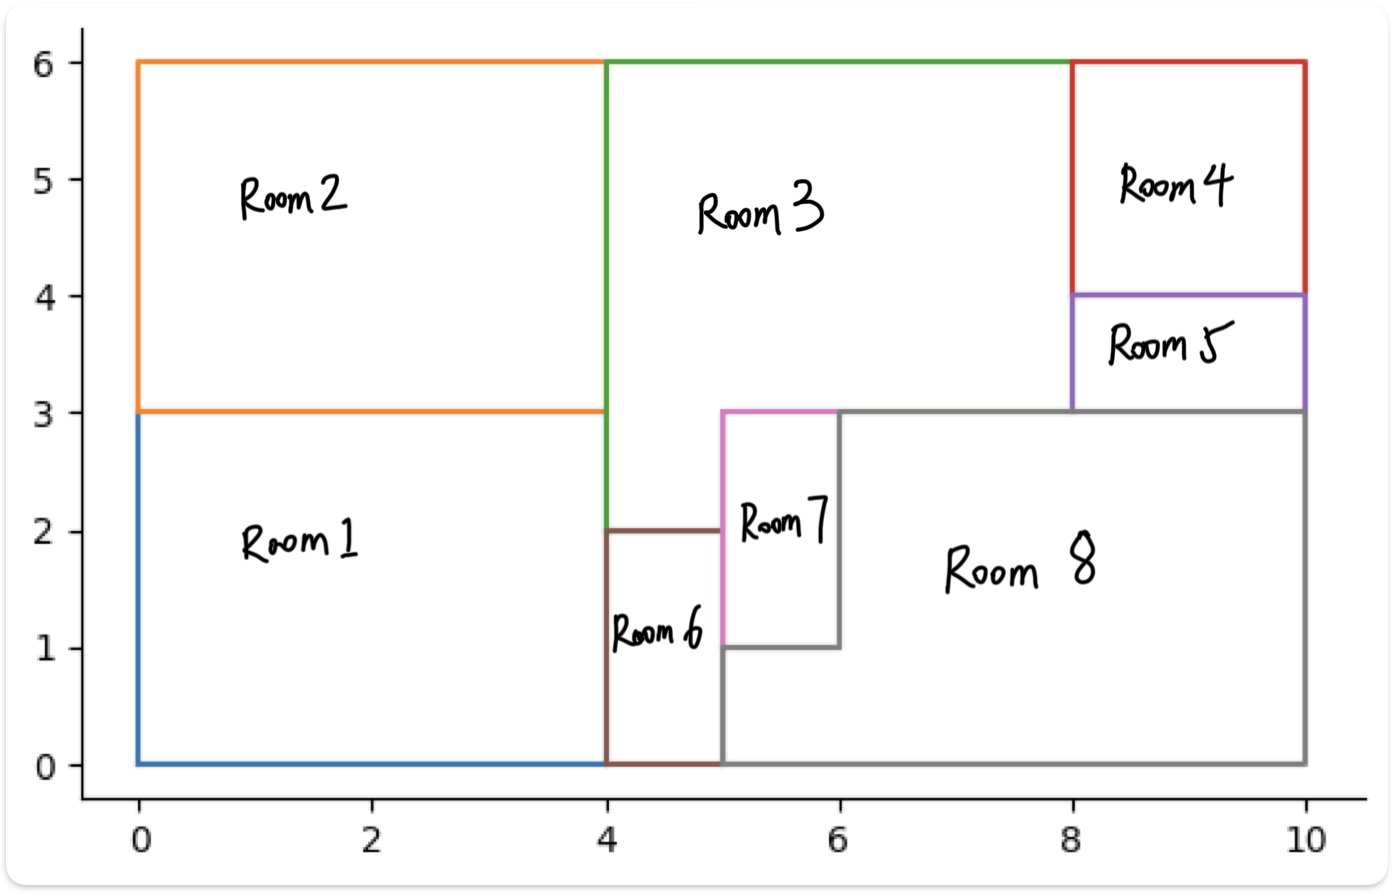

## 6. Decode the floor plan

In [29]:
import matplotlib.pyplot as plt

def draw_wall(vertices):
    x, y = [vertex.x for vertex in vertices], [vertex.y for vertex in vertices]
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    plt.fill(x, y, alpha=0.1)
    plt.plot(x, y)

Matplotlib is building the font cache; this may take a moment.


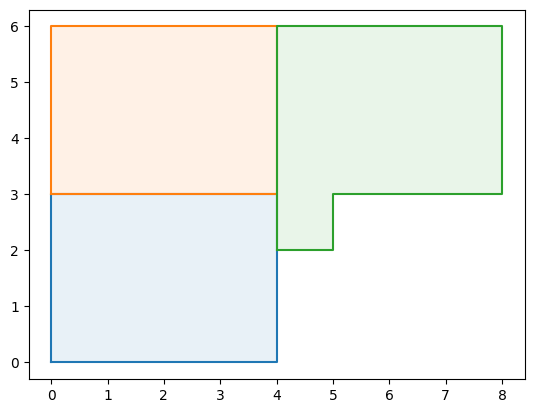

In [30]:
room1 = house1.rooms[0]
room2 = house1.rooms[1]
room3 = house1.rooms[2]
draw_wall(room1.vertices)
draw_wall(room2.vertices)
draw_wall(room3.vertices)

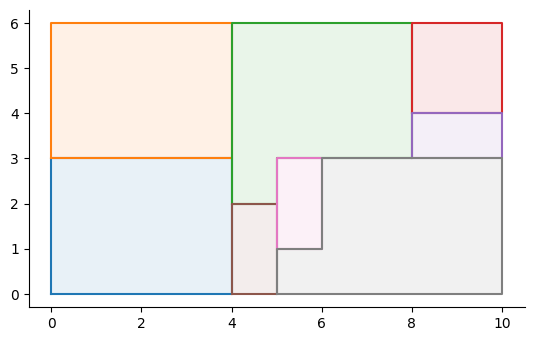

In [31]:
# Function to draw all rooms of the house
def draw_house(house):
    for room in house.rooms:
        draw_wall(room.vertices)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.show()

# decode the house object
draw_house(house1)

### Another example floor plan
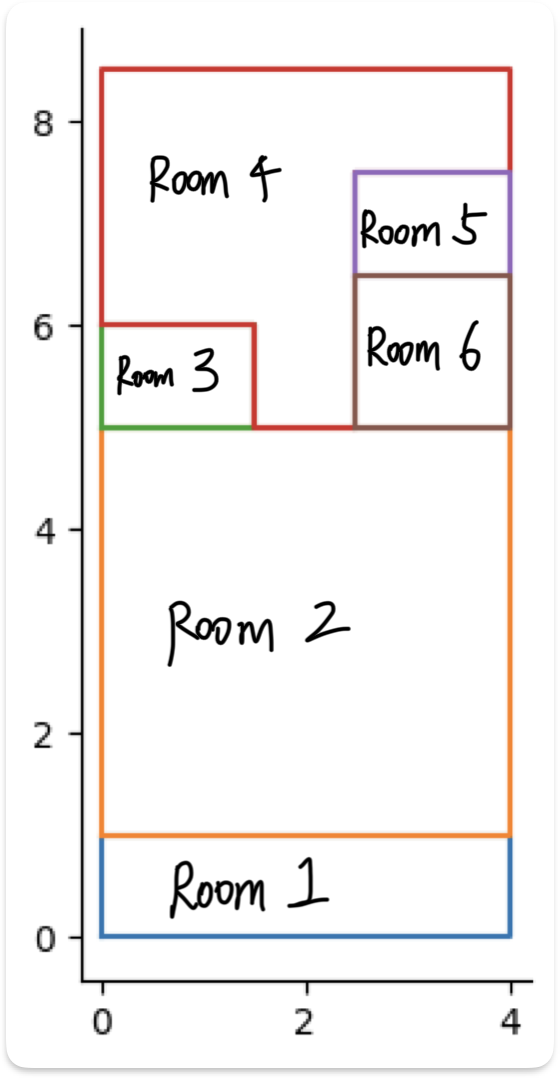

#### Encode

In [32]:
vertices1 = [Vertex(0, 0), Vertex(0, 1), Vertex(4, 1), Vertex(4, 0)]
vertices2 = [Vertex(0, 1), Vertex(0, 5), Vertex(4, 5), Vertex(4, 1)]
vertices3 = [Vertex(0, 5), Vertex(0, 6), Vertex(1.5, 6), Vertex(1.5, 5)]
vertices4 = [Vertex(0, 6), Vertex(0, 8.5), Vertex(4, 8.5), Vertex(4, 7.5), Vertex(2.5, 7.5), Vertex(2.5, 5), Vertex(1.5, 5), Vertex(1.5, 6)]
vertices5 = [Vertex(2.5, 6.5), Vertex(2.5, 7.5), Vertex(4, 7.5), Vertex(4, 6.5)]
vertices6 = [Vertex(2.5, 5), Vertex(2.5, 6.5), Vertex(4, 6.5), Vertex(4, 5)]

# Create doors for each room
door1 = Door('door1', Vertex(0, 0), Vertex(0, 1))
door2 = Door('door2', Vertex(0, 1), Vertex(0, 2))
door3 = Door('door3', Vertex(0, 5), Vertex(0, 6))
door4 = Door('door4', Vertex(0, 6), Vertex(0, 7))
door5 = Door('door5', Vertex(2.5, 6.5), Vertex(2.5, 7.5))
door6 = Door('door6', Vertex(2.5, 5), Vertex(2.5, 6))

# Create rooms with doors and windows
room1 = Room('room1', RoomType.LIVING_ROOM, vertices1, [door1], [])
room2 = Room('room2', RoomType.DINING_ROOM, vertices2, [door2], [])
room3 = Room('room3', RoomType.KITCHEN, vertices3, [door3], [])
room4 = Room('room4', RoomType.BEDROOM, vertices4, [door4], [])
room5 = Room('room5', RoomType.BATHROOM, vertices5, [door5], [])
room6 = Room('room6', RoomType.STORAGE_ROOM, vertices6, [door6], [])

# Add adjacent rooms
room1.adjacent_rooms = [room2]
room2.adjacent_rooms = [room1, room3, room4, room6]
room3.adjacent_rooms = [room2, room4]
room4.adjacent_rooms = [room2, room3, room5, room6]
room5.adjacent_rooms = [room4, room6]
room6.adjacent_rooms = [room2, room4, room5]

rooms = [room1, room2, room3, room4, room5, room6]
house2 = House(rooms)

#### Decode

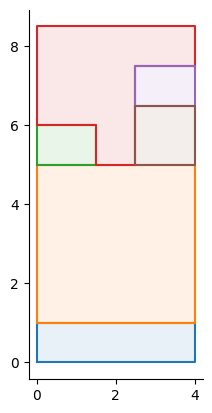

In [33]:
draw_house(house2)